In [1]:
import pandas as pd
import json
import numpy as np
import time, gc
from tqdm import tqdm
gc.enable()
import matplotlib.pyplot as plt

In [2]:
EnFr_shallom_embs_v1 = pd.read_csv('EN_FR_15K_V1/Shallom_entity_embeddings.csv')

In [4]:
Fr_shallom_embs_v1 = EnFr_shallom_embs_v1[EnFr_shallom_embs_v1['Unnamed: 0'].apply(lambda x: 'fr.dbpedia.org' in x)]

In [5]:
En_shallom_embs_v1 = EnFr_shallom_embs_v1.iloc[np.setdiff1d(np.arange(EnFr_shallom_embs_v1.shape[0]),\
                                                            np.array(Fr_shallom_embs_v1.index))].set_index('Unnamed: 0')

In [6]:
Fr_shallom_embs_v1 = Fr_shallom_embs_v1.set_index('Unnamed: 0')

In [8]:
with open('EN_FR_15K_V1/KG/ent_links') as file:
    en_to_fr_ents_v1 = file.read().strip().split('\n')
en_to_fr_ents_v1 = dict([line.split('\t') for line in en_to_fr_ents_v1])

## 2D

In [10]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [11]:
def search(string, Iterator_of_strings):
    string = string.replace(" ", "_")
    def __score(string1, string2):
        imax = len(string1)
        for i in range(1,imax+1)[::-1]:
            if string1[:i] in string2:
                return i
        return 0.0
    scores = {}
    for candidate in Iterator_of_strings:
        scores[candidate] = __score(string.lower(), candidate.lower())
    return sorted(list(scores.keys()), key=lambda x: -scores[x])

In [12]:
search("Trump", en_to_fr_ents_v1.keys())[:5]

['http://dbpedia.org/resource/A_Distant_Trumpet',
 'http://dbpedia.org/resource/Sounding_the_Seventh_Trumpet',
 'http://dbpedia.org/resource/Donald_Trump',
 'http://dbpedia.org/resource/Percussion_instrument',
 'http://dbpedia.org/resource/Anuthatantrum']

## Choose some entities and visualize embeddings

In [12]:
# physics, physicist, Nobel_prize_in_physics, Obama, Donald Trump

In [13]:
En_version = ['http://dbpedia.org/resource/Nobel_Prize_in_Physics', 
              'http://dbpedia.org/resource/Physics', 'http://dbpedia.org/resource/Physicist',
              'http://dbpedia.org/resource/Barack_Obama','http://dbpedia.org/resource/Donald_Trump'
             ]
chosen_entities = dict(list(filter(lambda x: x[0] in En_version, en_to_fr_ents_v1.items())))

In [14]:
chosen_entities

{'http://dbpedia.org/resource/Barack_Obama': 'http://fr.dbpedia.org/resource/Barack_Obama',
 'http://dbpedia.org/resource/Nobel_Prize_in_Physics': 'http://fr.dbpedia.org/resource/Prix_Nobel_de_physique',
 'http://dbpedia.org/resource/Donald_Trump': 'http://fr.dbpedia.org/resource/Donald_Trump',
 'http://dbpedia.org/resource/Physics': 'http://fr.dbpedia.org/resource/Physique',
 'http://dbpedia.org/resource/Physicist': 'http://fr.dbpedia.org/resource/Physicien'}

## Plot with t-SNE

In [15]:
import seaborn as sns
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE(n_components=2)
reduced_embs_fr = tsne.fit_transform(Fr_shallom_embs_v1.values)

/home/nkouagou/.conda/envs/unikge/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nkouagou/.conda/envs/unikge/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


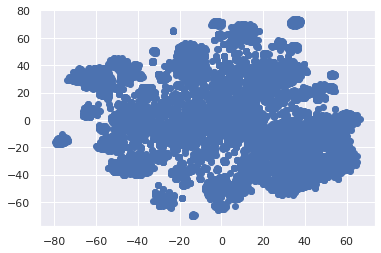

In [168]:
plt.scatter(reduced_embs_fr[:,0], reduced_embs_fr[:,1])
plt.savefig("fr_tsne_full.png")
plt.show()

In [18]:
reduced_embs_en = tsne.fit_transform(En_shallom_embs_v1.values)

/home/nkouagou/.conda/envs/unikge/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nkouagou/.conda/envs/unikge/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


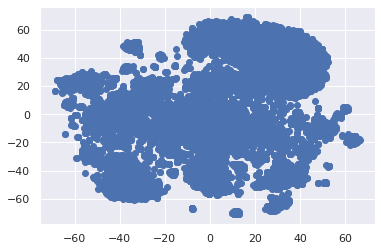

In [170]:
plt.scatter(reduced_embs_en[:,0], reduced_embs_en[:,1])
plt.savefig("en_tsne_full.png")
plt.show()

### Choose and visualize some entities

In [175]:
En_version = ['http://dbpedia.org/resource/Nobel_Prize_in_Physics', 
              'http://dbpedia.org/resource/Physics', 'http://dbpedia.org/resource/Physicist',
              'http://dbpedia.org/resource/Barack_Obama','http://dbpedia.org/resource/Donald_Trump'
             ]
chosen_entities = dict(list(filter(lambda x: x[0] in En_version, en_to_fr_ents_v1.items())))

In [180]:
names

['Barack_Obama',
 'Prix_Nobel_de_physique',
 'Donald_Trump',
 'Physique',
 'Physicien']

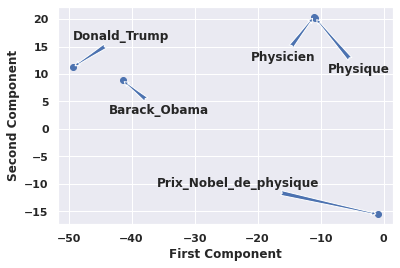

In [200]:
fr_ids = [list(Fr_shallom_embs_v1.index).index(e) for e in chosen_entities.values()]
names = [e.split('/')[-1] for e in chosen_entities.values()]
x_i = reduced_embs_fr[fr_ids,0]
y_i = reduced_embs_fr[fr_ids,1]

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

fig, ax = plt.subplots()
ax.scatter(x_i, y_i);
ax.annotate(names[0], (x_i[0], y_i[0]), xytext=(x_i[0]-2.2, y_i[0]-6), 
    arrowprops=dict(arrowstyle="fancy"))

ax.annotate(names[1], (x_i[1], y_i[1]), xytext=(x_i[1]-35, y_i[1]+5), 
    arrowprops = dict(arrowstyle="fancy"))

ax.annotate(names[2], (x_i[2], y_i[2]), xytext=(x_i[2]-0.1, y_i[2]+5), 
    arrowprops = dict(arrowstyle="fancy"))

ax.annotate(names[3], (x_i[3], y_i[3]), xytext=(x_i[3]+2, y_i[3]-10), 
    arrowprops = dict(arrowstyle="fancy"))

ax.annotate(names[4], (x_i[4], y_i[4]), xytext=(x_i[4]-10, y_i[4]-8),
    arrowprops = dict(arrowstyle="fancy"))
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.savefig("fr_tsne.pdf", bbox_inches='tight')
plt.show()

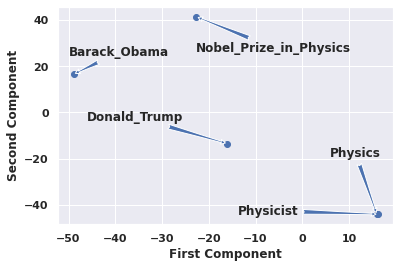

In [205]:
en_ids = [list(En_shallom_embs_v1.index).index(e) for e in chosen_entities]
names = [e.split('/')[-1] for e in chosen_entities]
x_i = reduced_embs_en[en_ids,0]
y_i = reduced_embs_en[en_ids,1]

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig, ax = plt.subplots()
ax.scatter(x_i, y_i);
ax.annotate(names[0], (x_i[0], y_i[0]), xytext=(x_i[0]-1, y_i[0]+8), 
    arrowprops=dict(arrowstyle="fancy"))

ax.annotate(names[1], (x_i[1], y_i[1]), xytext=(x_i[1], y_i[1]-15), 
    arrowprops = dict(arrowstyle="fancy"))

ax.annotate(names[2], (x_i[2], y_i[2]), xytext=(x_i[2]-30, y_i[2]+10), 
    arrowprops = dict(arrowstyle="fancy"))

ax.annotate(names[3], (x_i[3], y_i[3]), xytext=(x_i[3]-10, y_i[3]+25), 
    arrowprops = dict(arrowstyle="fancy"))

ax.annotate(names[4], (x_i[4], y_i[4]), xytext=(x_i[4]-30, y_i[4]),
    arrowprops = dict(arrowstyle="fancy"))
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.savefig("en_tsne.pdf", bbox_inches='tight')
plt.show()

In [ ]:
for x,y zip([2,3,5], [0,1,8]):
    print(x)

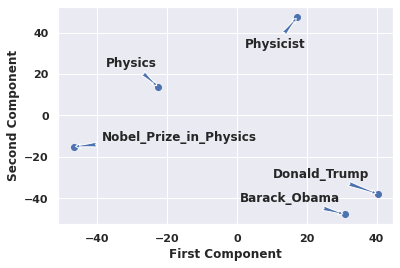

In [218]:
en_ids = [list(En_shallom_embs_v1.index).index(e) for e in chosen_entities]
names = [e.split('/')[-1] for e in chosen_entities]
x_i = reduced_uni_embs[en_ids,0]
y_i = reduced_uni_embs[en_ids,1]

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig, ax = plt.subplots()
ax.scatter(x_i, y_i);

ax.annotate(names[0], (x_i[0], y_i[0]), xytext=(x_i[0]-30, y_i[0]+6), 
    arrowprops=dict(arrowstyle="fancy"))

ax.annotate(names[1], (x_i[1], y_i[1]), xytext=(x_i[1]+8, y_i[1]+3), 
    arrowprops = dict(arrowstyle="fancy"))

ax.annotate(names[2], (x_i[2], y_i[2]), xytext=(x_i[2]-30, y_i[2]+8), 
    arrowprops = dict(arrowstyle="fancy"))

ax.annotate(names[3], (x_i[3], y_i[3]), xytext=(x_i[3]-15, y_i[3]+10), 
    arrowprops = dict(arrowstyle="fancy"))

ax.annotate(names[4], (x_i[4], y_i[4]), xytext=(x_i[4]-15, y_i[4]-15), 
    arrowprops = dict(arrowstyle="fancy"))
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.savefig("universal_tsne.pdf", bbox_inches='tight')
plt.show()

In [207]:
names

['Barack_Obama',
 'Nobel_Prize_in_Physics',
 'Donald_Trump',
 'Physics',
 'Physicist']